# Load Libraries/Data

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# list of named time zones
import pytz
#all_tzs = pytz.all_timezones
#len(all_tzs)

# import the statsmodels time series analysis api module
# seasonal decompose
import statsmodels.tsa.api as tsa

# get peaks (max point) of each season
from scipy.signal import find_peaks

import holidays
import datetime as dt
from holidays import country_holidays

import glob


import warnings
warnings.filterwarnings('ignore')

In [2]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [3]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df_combined

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380
...,...,...,...,...,...,...,...,...,...,...,...
13152058,07/25/2023 12:50:00 AM,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,41.742106,-87.569737
13152174,07/25/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,41.657677,-87.605272
13152725,07/25/2023 12:51:00 PM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,41.773458,-87.576184


In [4]:
df = df_combined.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310873 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


In [5]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Clean Features

In [6]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380


## Convert 'Date' to datetime dtype

In [7]:
fmt = '%m/%d/%Y %I:%M:%S %p'

In [8]:
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [9]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
ID,,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145,2001-01-01 13:00:00
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828,2001-01-01 13:00:00
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534,2001-01-01 01:00:00
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380,2001-01-01 13:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310873 to 13152172
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 674.2+ MB


## Set 'Datetime' As Index

In [11]:
df = df.set_index('Datetime')
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185


## Remove Unnecessary Columns

In [12]:
df.drop(columns='Date', inplace=True)
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185


# Task

## **Topic 1) Comparing Police Districts:**
- **Which district has the most crimes?** 
    - *District 8 has the most crime with 527,600 counts*


- **Which has the least?**
    - *District 21 has the least with 4 counts*

In [13]:
np.sort(df['Primary Type'].unique())

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [14]:
print(df['Primary Type'].unique())
len(df['Primary Type'].unique())

['OTHER OFFENSE' 'BATTERY' 'PUBLIC PEACE VIOLATION' 'BURGLARY'
 'CRIMINAL DAMAGE' 'THEFT' 'MOTOR VEHICLE THEFT' 'DECEPTIVE PRACTICE'
 'OFFENSE INVOLVING CHILDREN' 'WEAPONS VIOLATION' 'CRIM SEXUAL ASSAULT'
 'SEX OFFENSE' 'NARCOTICS' 'ASSAULT' 'GAMBLING' 'LIQUOR LAW VIOLATION'
 'ROBBERY' 'CRIMINAL TRESPASS' 'INTERFERENCE WITH PUBLIC OFFICER'
 'HOMICIDE' 'KIDNAPPING' 'PROSTITUTION' 'STALKING' 'INTIMIDATION'
 'CRIMINAL SEXUAL ASSAULT' 'ARSON' 'RITUALISM' 'DOMESTIC VIOLENCE'
 'OBSCENITY' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']


36

In [15]:
df1 = df.copy()
df1

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
2001-01-01 13:00:00,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380
...,...,...,...,...,...,...,...,...,...,...
2023-07-25 00:50:00,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,41.742106,-87.569737
2023-07-25 00:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,41.657677,-87.605272
2023-07-25 12:51:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,41.773458,-87.576184


In [16]:
len(df1['Primary Type'].unique())

36

### Get Counts of Districts

In [17]:
plot_1 = df1['District'].value_counts().sort_values()
plot_1

21.0         4
31.0       246
20.0    139070
17.0    226698
24.0    237564
22.0    257351
16.0    263114
14.0    303754
1.0     318353
15.0    336085
10.0    338494
5.0     347809
18.0    352735
19.0    353148
2.0     372217
9.0     383557
12.0    389772
3.0     398385
4.0     446049
25.0    446658
7.0     453430
6.0     459446
11.0    503791
8.0     527625
Name: District, dtype: int64

In [18]:
plot_1.values.sum()

7855355

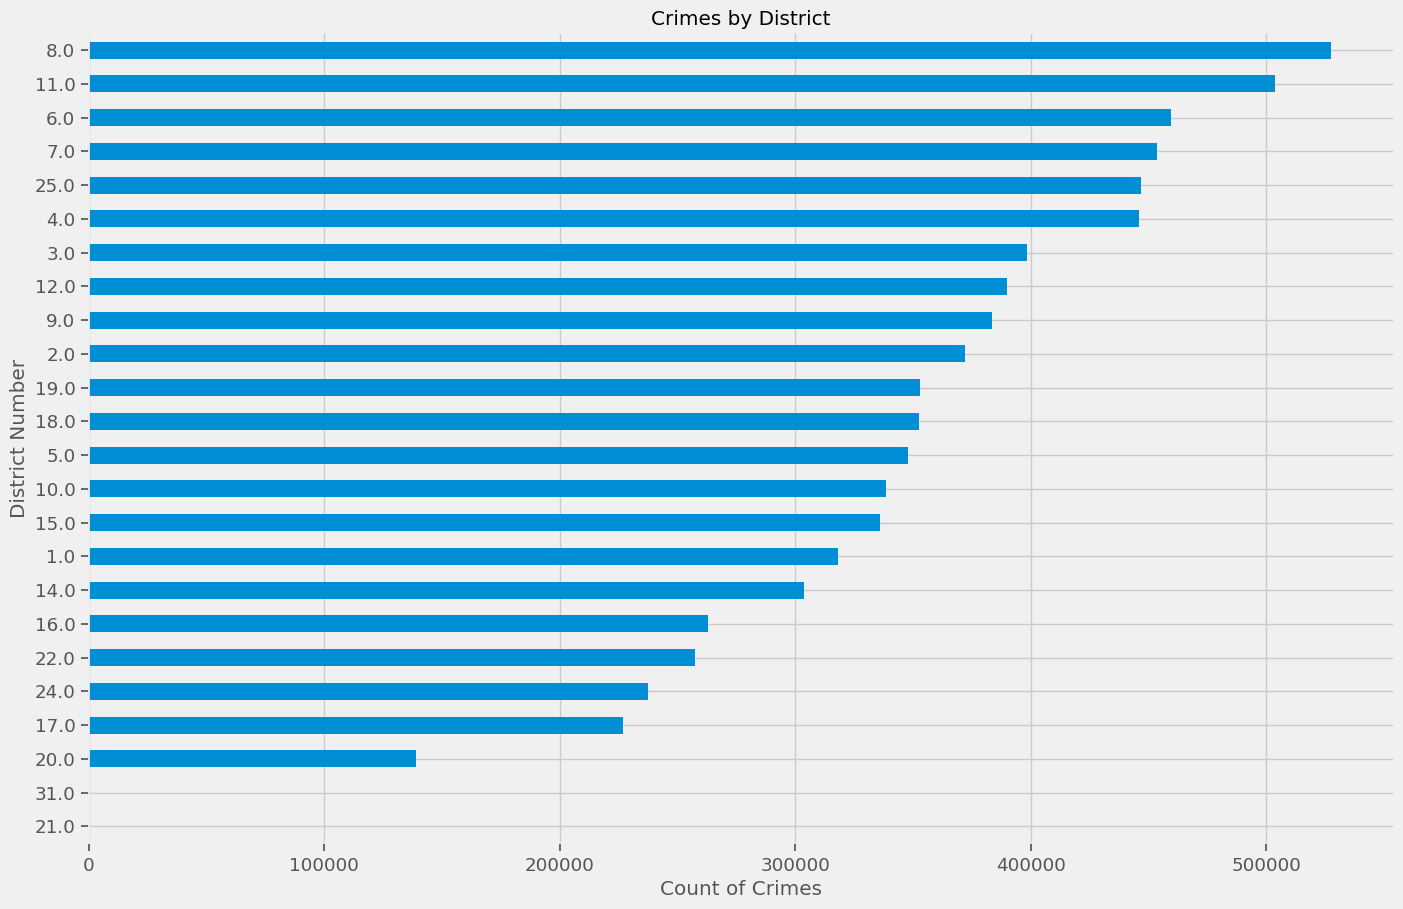

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_1.plot(kind='barh')

plt.xlabel('Count of Crimes')
plt.ylabel('District Number')
plt.title('Crimes by District');

## **Topic 2) Crimes Across the Years:**
- **Is the total number of crimes increasing or decreasing across the years?**
    - *From 2001 to 2023, crime has decreased.*


- **Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**
    - *Seems to be some crimes have trended up, in contrast to the general trend down:*

        - 'CONCEALED CARRY LICENSE VIOLATION'
        - 'DECEPTIVE PRACTICES'
        - 'HOMICIDE'
        - 'HUMAN TRAFFICKING'
        - 'VEHICLE THEFT' (very recently has spiked)
        - 'OBSCENITY'
        - 'STALKING'
        - 'WEAPONS VIOLATION'

### Crimes Increasing or Decreasing Across the Years?

In [20]:
df2 = df.copy()

In [21]:
df2['Year'] = df2.index.year

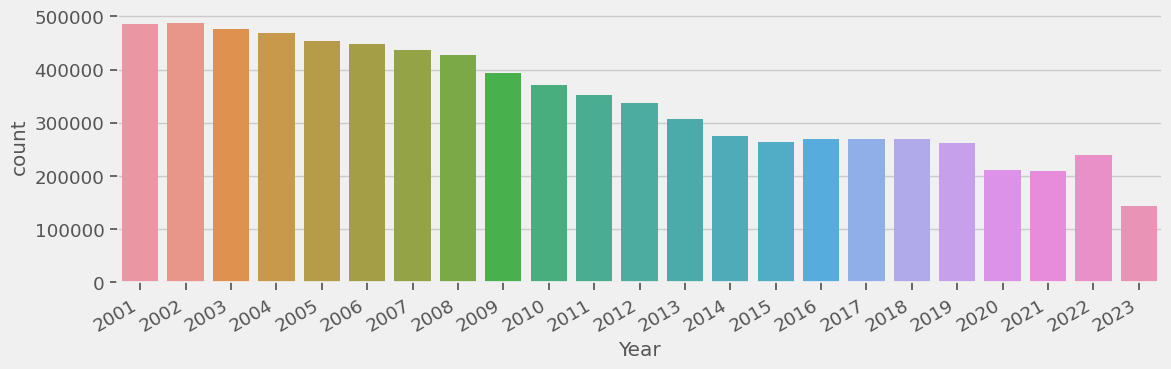

In [22]:
## Visualize years
ax = sns.countplot(data=df2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [23]:
df2['Year'].value_counts().sort_index(ascending = False)

2023    142812
2022    238740
2021    208761
2020    212176
2019    261293
2018    268818
2017    269099
2016    269814
2015    264777
2014    275748
2013    307479
2012    336276
2011    351975
2010    370505
2009    392826
2008    427169
2007    437087
2006    448179
2005    453772
2004    469421
2003    475984
2002    486806
2001    485885
Name: Year, dtype: int64

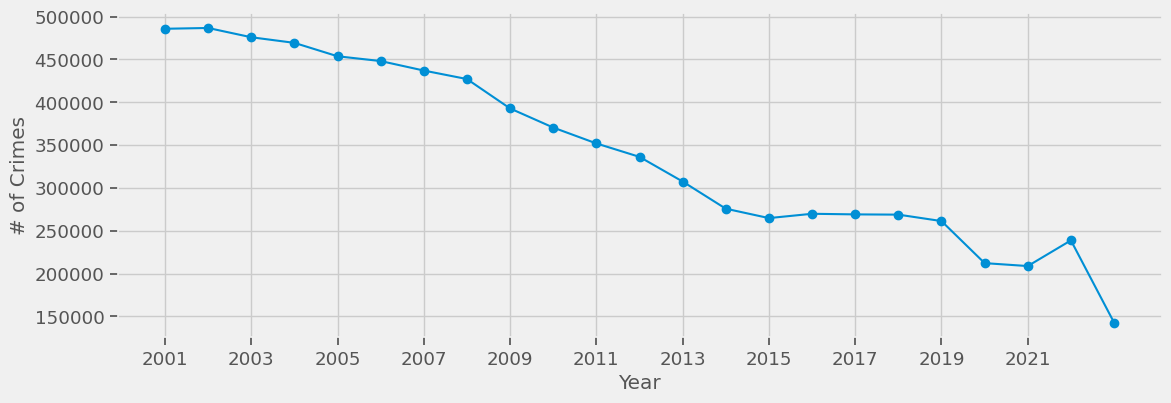

In [24]:
## save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2023, step=2));

### Any Crimes Going Against the Overall Trend?

In [25]:
df2

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145,2001
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828,2001
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534,2001
2001-01-01 13:00:00,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380,2001
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25 00:50:00,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,41.742106,-87.569737,2023
2023-07-25 00:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,41.657677,-87.605272,2023
2023-07-25 12:51:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,41.773458,-87.576184,2023


In [ ]:
plot_type = df2.groupby('Primary Type').resample('M').size()

In [ ]:
plot_type = plot_type.unstack().T
plot_type

In [ ]:
plot_type = plot_type.fillna(0.0)
plot_type.isna().sum().sum()

#### Yearly Trend Visualization per Crime

In [ ]:
len(plot_type.columns)

In [ ]:
fig, axes = plt.subplots(12, 3, figsize=(15,30))

for indx, crime in enumerate(plot_type.columns):
    row = indx // 3
    col = indx % 3
    ts = plot_type[crime]
    decomp = tsa.seasonal_decompose(ts)
    
    decomp.trend.plot(title=f'{crime} Trend', ax = axes[row, col])
    axes[row, col].set_title(f'Trend {crime}')
plt.tight_layout()

## **Topic 4) Comparing Months:**

- **What months have the most crime? What months have the least?**
    - *The most crime seems to occur during the Summer months (May to August)*
    - *The least crime occurs during the Winter months (November to February)*


- **Are there any individual crimes that do not follow this pattern? If so, which crimes?**

- *Some Crimes do seem to buck the overall trend (does not create a distinct "hump" during the Summer Months)*
    - 'DECEPTIVE PRACTICE'
    - 'NARCOTICS' (has more of a continuous downward trend)
    - 'OBSCENITY'
    - 'OFFENSE INVOLVING CHILDREN'
    - 'RITUALISM' (drops substantially April to July and spikes in August)

In [ ]:
df4 = df.copy()

In [ ]:
df4['Month'] = df4.index.month
df4['MonthName'] = df4.index.month_name()
df4.head(3)

In [ ]:
# saving lookup for number vs name
unique_months = df4.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

In [ ]:
ax = sns.countplot(data=df4, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Visualization Count of Crimes per Month

In [ ]:
## save month counts
# month_lookup.values() will reorder df['MonthName'].value_counts() by month
month_counts = df4['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

### Any Crimes Going Against Monthly Trend?

In [ ]:
df4

In [ ]:
plot_type4 = df4.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()
plot_type4

In [ ]:
plot_type4_df = plot_type4.to_frame('# of Crimes').reset_index()
plot_type4_df

In [ ]:
plot_type4.index

In [ ]:
g = sns.catplot(data=plot_type4_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];